In [9]:
from study_help import load_studies
from study_visualize import visualize_main_results, visualize_familiarity, visualize_familiarity_correlation
from study import Study

from pathlib import Path

In [10]:
studies = load_studies(Path.cwd().parent / 'study_data')

In [11]:
for s in studies:
    s.evaluate()

Response 0 of study 251570_ours has an accuracy of 0.1
Response 1 of study 251570_ours has an accuracy of 0.9
Response 2 of study 251570_ours has an accuracy of 0.6
Response 3 of study 251570_ours has an accuracy of 1.0
Response 4 of study 251570_ours has an accuracy of 0.1
Response 5 of study 251570_ours has an accuracy of 1.0
Response 6 of study 251570_ours has an accuracy of 0.3
Response 7 of study 251570_ours has an accuracy of 0.9
Response 8 of study 251570_ours has an accuracy of 0.9
Average accuracy for study 251570_ours is 0.6444444444444445
Response 0 of study 251570_vandenhende has an accuracy of 1.0
Response 1 of study 251570_vandenhende has an accuracy of 1.0
Response 2 of study 251570_vandenhende has an accuracy of 1.0
Response 3 of study 251570_vandenhende has an accuracy of 1.0
Response 4 of study 251570_vandenhende has an accuracy of 0.9
Response 5 of study 251570_vandenhende has an accuracy of 0.9
Response 6 of study 251570_vandenhende has an accuracy of 0.9
Average ac

In [12]:
for s in studies:    
    s.create_valid_responses().evaluate()

Response 0 of study 251570_ours (Valid Intro) has an accuracy of 0.6
Response 1 of study 251570_ours (Valid Intro) has an accuracy of 1.0
Response 2 of study 251570_ours (Valid Intro) has an accuracy of 0.1
Response 3 of study 251570_ours (Valid Intro) has an accuracy of 1.0
Response 4 of study 251570_ours (Valid Intro) has an accuracy of 0.3
Response 5 of study 251570_ours (Valid Intro) has an accuracy of 0.9
Response 6 of study 251570_ours (Valid Intro) has an accuracy of 0.9
Average accuracy for study 251570_ours (Valid Intro) is 0.6857142857142857
Response 0 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 1 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 2 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 3 of study 251570_vandenhende (Valid Intro) has an accuracy of 0.9
Response 4 of study 251570_vandenhende (Valid Intro) has an accuracy of 0.9
Average accuracy for study 251570_vandenhende (Valid Intro) is

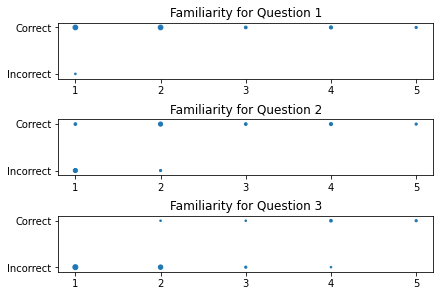

In [13]:
visualize_familiarity_correlation(studies)

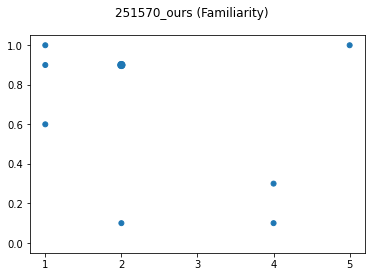

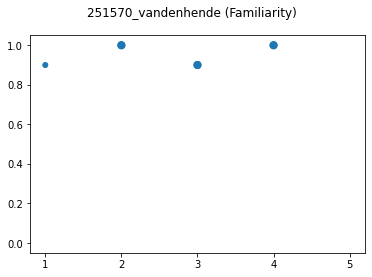

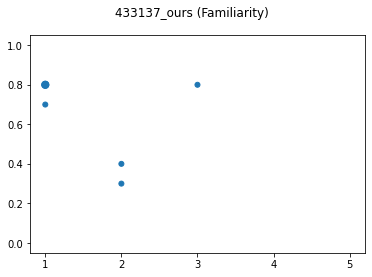

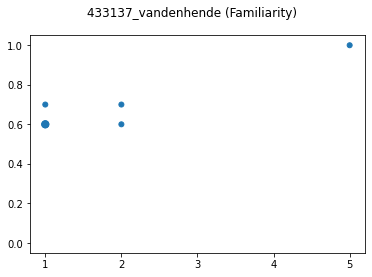

In [14]:
for s in studies:
    visualize_familiarity(s)

Number of valid responses: 7 out of 9


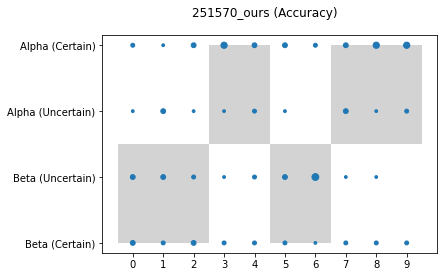

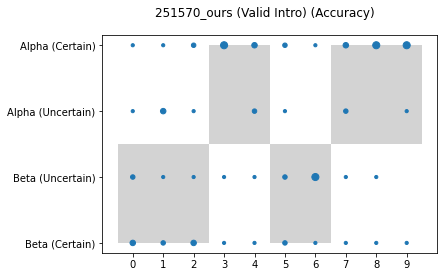

Number of valid responses: 5 out of 7


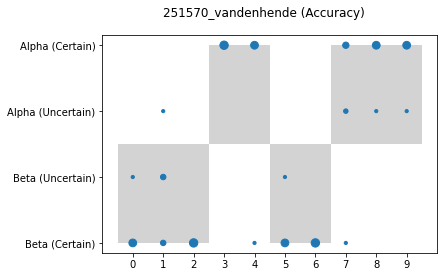

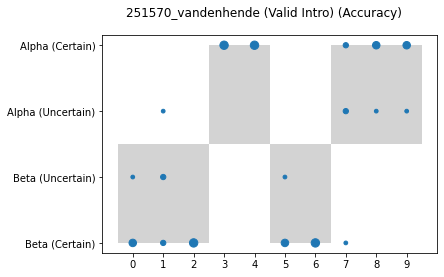

Number of valid responses: 4 out of 6


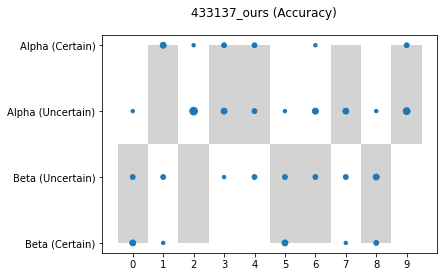

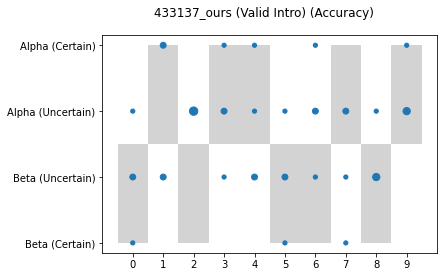

Number of valid responses: 4 out of 6


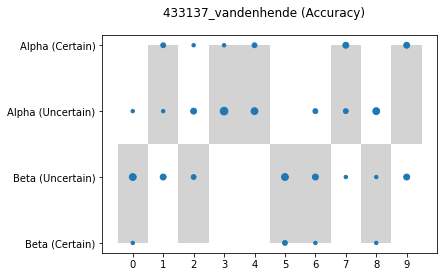

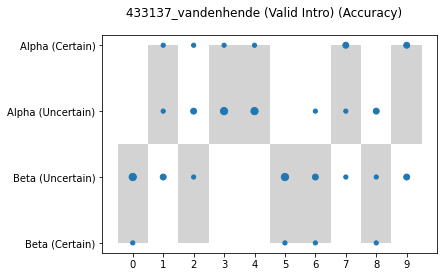

In [15]:
for s in studies:
    visualize_main_results(s, show_individual=True)